In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls ../data/tmalign-test-data/blast

blast_alignments_1e-3.bz   test_ids_1e-3.txt
blast_alignments_1e-3.txt  test_ids.txt


In [3]:
test_ids = open('../data/tmalign-test-data/blast/test_ids_1e-3.txt').readlines()
test_ids = set(list(map(lambda x: x.rstrip(), test_ids)))

In [4]:
DIR='../data/tmalign-test-data'
test = f'{DIR}/test.txt-results.csv'
#test_within = f'{DIR}/test-within-pfam.txt'
#test_outside = f'{DIR}/test-outside-pfam.txt'
#within = pd.read_table(test_within, header=None)
#outside = pd.read_table(test_outside, header=None)
test = pd.read_csv(test, index_col=0)

In [5]:
test['query_name'] = test['query_name'].apply(lambda x: x.split('/')[-1])
test['key_name'] = test['key_name'].apply(lambda x: x.split('/')[-1])

In [6]:
def assign_dataset(x):
    if  x['query_name'] in test_ids and x['key_name'] in test_ids:
        return 'both-test'
    elif x['query_name'] not in test_ids and x['key_name'] not in test_ids:
        return 'both-train'
    else:
        return 'one-test-train'
test['dataset'] = test.apply(assign_dataset, axis=1)

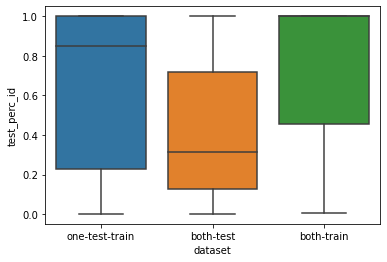

In [7]:
sns.boxplot(x='dataset', y='test_perc_id', data=test)

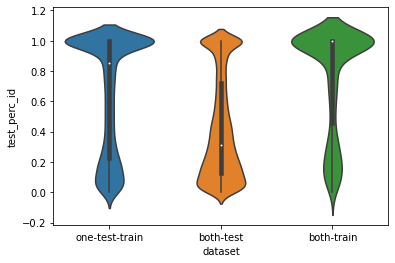

In [8]:
sns.violinplot(x='dataset', y='test_perc_id', data=test)

/home/juermieboop/miniconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juermieboop/miniconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juermieboop/miniconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

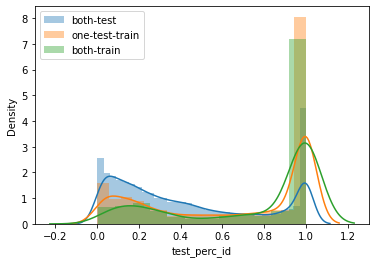

In [9]:
sns.distplot(test.loc[test['dataset'] == 'both-test', 'test_perc_id'], label='both-test')
sns.distplot(test.loc[test['dataset'] == 'one-test-train', 'test_perc_id'], label='one-test-train')
sns.distplot(test.loc[test['dataset'] == 'both-train', 'test_perc_id'], label='both-train')
plt.legend()

In [10]:
sns.__version__

'0.11.0'

Text(0, 0.5, 'Probability')

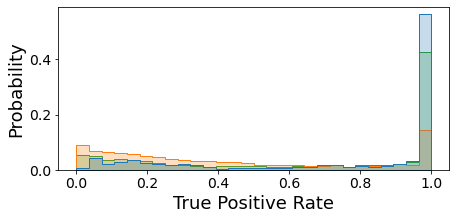

In [20]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.histplot(test, x='test_perc_id', hue="dataset", element="step",
             stat="probability", ax=ax, hue_order=['both-train', 'both-test', 'one-test-train'],
             common_norm=False, legend=False)
ax.tick_params(labelsize=14)
ax.set_xlabel('True Positive Rate', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)

#g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [30]:
print(test.groupby('dataset').mean()[['test_perc_id', 'test_ppv', 'test_fnr', 'test_fdr']].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  test\_perc\_id &  test\_ppv &  test\_fnr &  test\_fdr \\
dataset        &               &           &           &           \\
\midrule
both-test      &      0.420726 &  0.415809 &  0.579274 &  0.584191 \\
both-train     &      0.754996 &  0.751743 &  0.245004 &  0.248257 \\
one-test-train &      0.649738 &  0.648367 &  0.350262 &  0.351633 \\
\bottomrule
\end{tabular}

